In [1]:
%load_ext autoreload
%autoreload 2

from sklearn import datasets, svm
import gradio
import matplotlib.pyplot as plt

# The digits dataset
digits = datasets.load_digits()

In [2]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [3]:
data.max()

16.0

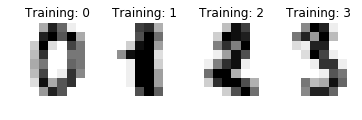

In [4]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)


In [5]:
classifier.predict()

TypeError: predict() missing 1 required positional argument: 'X'

In [6]:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

In [7]:
inp = gradio.inputs.Sketchpad(shape=(8, 8), flatten=True, scale=16/255, invert_colors=False)
io = gradio.Interface(inputs=inp, outputs="label", model_type="sklearn", model=classifier)

In [8]:
io.launch()

No validation samples for this interface... skipping validation.
NOTE: Gradio is in beta stage, please report all bugs to: gradio.app@gmail.com
Model is running locally at: http://localhost:7862/
Model available publicly at: https://52991.gradio.app


(<gradio.networking.serve_files_in_background.<locals>.HTTPServer at 0x1b59a2a8d30>,
 'http://localhost:7862/',
 'https://52991.gradio.app')